# Healthcare Dataset

Text classification is the process of categorizing text into pre-defined groups (WorldClass Week 4). Examples of the different groups are given, and then the classifying algorithm learns to recognize features in order to identify a given category or group (WorldClass Week 4). Text classifiers can be used to organize, structure, and categorize data (Text classification, n.d.). A few supervised classification methods include Naive Bayes, support vector machines (SVM), K-nearest neighbors, etc. (WorldClass Week 4). Each algorithm follows the general process (WorldClass Week 4):

    1. Document
    2. Pre-processing
    3. Document Representation
    4. Feature Selection
    5. Classification Method
    6. Evaluation

For this assignment, we will being applying the Naive Bayes algorithm and a Support Vector Machine algorithm to a healthcare-related dataset. The dataset we will be using contains sample medical transcriptions for various medical specialties (Boyle, n.d.). The descriptions for each of the columns can be found below (Boyle, n.d.):

    1. Description: A short description of the medical transcription.
    2. Medical Specialty: Classification of the medical transcription.
    3. Sample Name: Title of medical transcription.
    4. Transcription: Sample of medical transcription; description of visit, diagnosis, etc.
    5. Keywords: Relevant keywords from the transcription.
    
We will use the Naive Bayes algorithm and a Support Vector Machine algorithm to classify our medical specialties (`Medical specialties`) based on the  transcription (`Transcription`) text. 

## Load Dataset

First, we need to load our dataset using Pandas. In our `read_csv()` function, we will use the argument `skipinitialspace = True` to skip whitespaces after the delimiter (Read_csv, n.d.). Without this argument, there were many whitespaces in our dataset that had to be removed.

In [1]:
import pandas as pd
medical_df = pd.read_csv("C:/Users/07hoc/Downloads/MSDS 682 Downloads/Week 8/mtsamples.csv", sep =',', skipinitialspace = True)

In [2]:
medical_df.head(3)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with compl...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."


To get an idea of the information in our dataset, we can view the first element in each column. 

In [3]:
medical_df['description'].iloc[0]

'A 23-year-old white female presents with complaint of allergies.'

In [4]:
medical_df['medical_specialty'].iloc[0]

'Allergy / Immunology'

In [5]:
medical_df['sample_name'].iloc[0]

'Allergic Rhinitis '

In [6]:
medical_df['transcription'].iloc[0]

'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  Supple without adenopathy.,

In [7]:
medical_df['keywords'].iloc[0]

'allergy / immunology, allergic rhinitis, allergies, asthma, nasal sprays, rhinitis, nasal, erythematous, allegra, sprays, allergic,'

We can see a summary of the transcription, the category of the transcription, the diagnosis/procedure of the transcription, the full transcription, and keywords associated with the transcription. 

### Drop Column,  Clean Column Names, Add New Column

Before we can classify our text, there are a few data cleaning techniques and analyses we need to perform. First, we can see by our `medical_df.head(3)` output above, that our dataset contains an unnecessary column. Thus, we will remove it.  

In [8]:
#drop column 
medical_df = medical_df.drop('Unnamed: 0', axis = 1)

Now, we will clean our column names by removing the `_` (underscore) and by capitalizing the first letter in each name. 

In [9]:
medical_df.columns

Index(['description', 'medical_specialty', 'sample_name', 'transcription',
       'keywords'],
      dtype='object')

In [10]:
#edit column names
medical_df.columns = medical_df.columns.str.replace('_', ' ').str.capitalize()

In [11]:
medical_df.columns 

Index(['Description', 'Medical specialty', 'Sample name', 'Transcription',
       'Keywords'],
      dtype='object')

Now, our `Sample name` column contains numbers at the end of the diagnosis/procedure, which appears to either indicate the number of diagnoses/procedures they have performed for that patient or a count of that particular diagnosis/procedure. To keep these values,  we are going to make a copy of this column and then remove the numbers from the `Sample name` column so we can look at the unique values in this column. 

In [12]:
medical_df['Sample name'].iloc[1]

'Laparoscopic Gastric Bypass Consult - 2 '

In [13]:
#add sample level column to keep numbers 
medical_df['Sample number'] = medical_df['Sample name'].copy()

In [14]:
#remove digits from sample name column
import re
medical_df['Sample name'] = medical_df['Sample name'].apply(lambda x: re.sub('- \d', '', str(x)))

In [15]:
#confirm change
counter = 0 
for x in medical_df['Sample name']:
    if counter == 10:
        break
    else:
        print(x)
    counter = counter + 1

Allergic Rhinitis 
Laparoscopic Gastric Bypass Consult  
Laparoscopic Gastric Bypass Consult  
2-D Echocardiogram  
2-D Echocardiogram  
Laparoscopic Gastric Bypass 
Liposuction 
2-D Echocardiogram  
Lipectomy - Abdomen/Thighs 
2-D Echocardiogram  


Notice, there are no numbers at the end of our `Sample name` values. 

### Null Values

Now, let's determine how many null values are in our dataset and determine where they are. To determine where our null values are, we can use the `missingno` module (Visualize missing values values using Missingno Library, 2019).  

In [16]:
medical_df.isnull().sum()

Description             6
Medical specialty       0
Sample name             0
Transcription          33
Keywords             1149
Sample number           0
dtype: int64

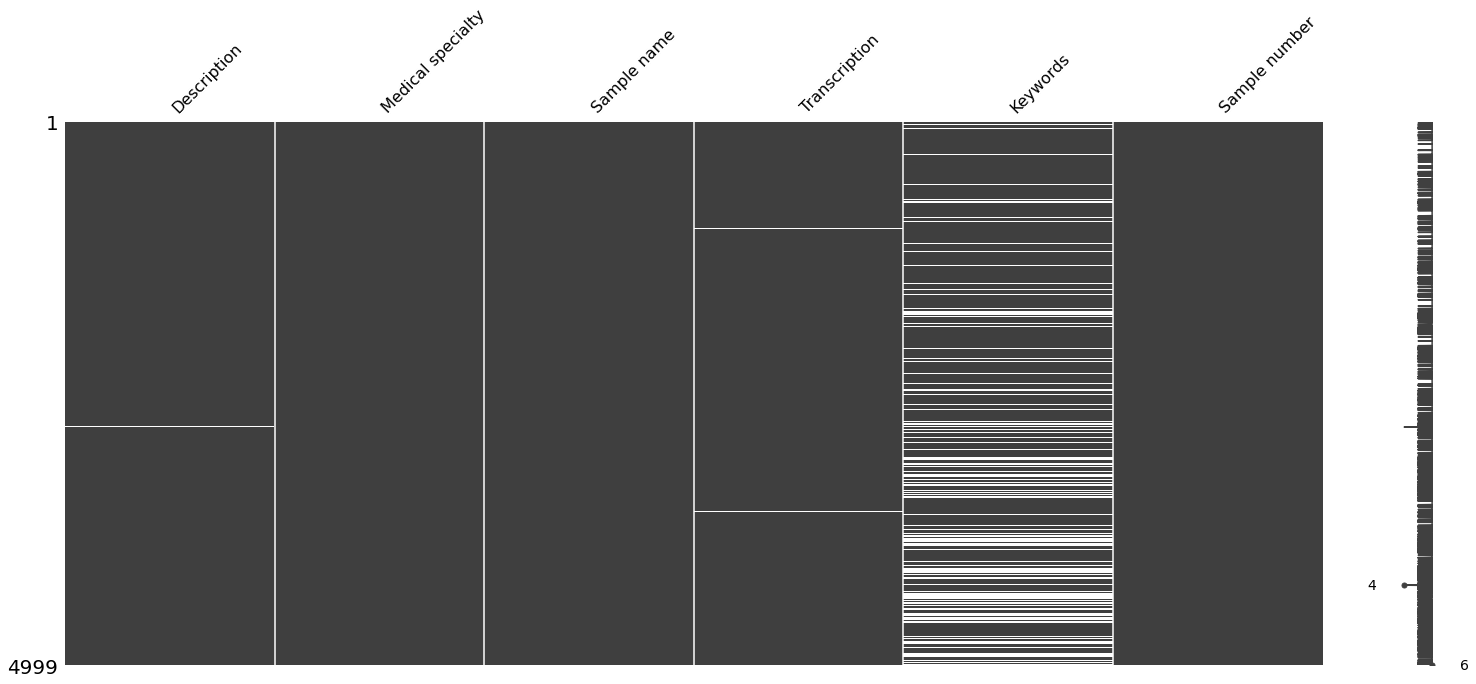

In [19]:
import missingno as msno
msno.matrix(medical_df)

#Note, sometimes the cell needs to be run twice

In [20]:
(medical_df['Keywords'].isnull().sum()/len(medical_df))*100

22.984596919383876

The majority of the missing values can be found in our `Keywords` column. Approximately ~22% of the data in our `Keywords` column are null values. Instead of removing the rows with null values, we will replace the null values in our `Keywords` column with a `NR` value to indicate that keywords for that transcription were `not recorded`. To do this, we will use the `fillna()` function (Fillna, n.d.).

In [21]:
medical_df['Keywords'] = medical_df['Keywords'].fillna('NR') #Not Recorded

In [22]:
medical_df.isnull().sum()

Description           6
Medical specialty     0
Sample name           0
Transcription        33
Keywords              0
Sample number         0
dtype: int64

The column with the second most number of null values is the `Transcription` column. Now, replacing the null values in this column with a `NR` will not benefit, and may skew, our results when we perform text classification. Thus, we will remove the remainder of the rows with null values since the percentage of null values in each column is so low. To remove these rows, we will use the `dropna()` function (Dropna, n.d.).

In [23]:
(medical_df['Transcription'].isnull().sum()/len(medical_df))*100

0.6601320264052811

In [24]:
medical_df = medical_df.dropna()

In [25]:
medical_df.isnull().sum().sum()

0

## Data Exploration 

Now that we have cleaned our data values and have handled the null values, we can explore the values in each column. First, let's view the distribution of our medical specialties (`Medical Specialty`). 

In [26]:
print('There are {} unique values in our Medical specialty column.'.format(len(medical_df['Medical specialty'].value_counts())))

There are 40 unique values in our Medical specialty column.


Text(0.5, 1.0, 'Counts for Each Medical Specialty')

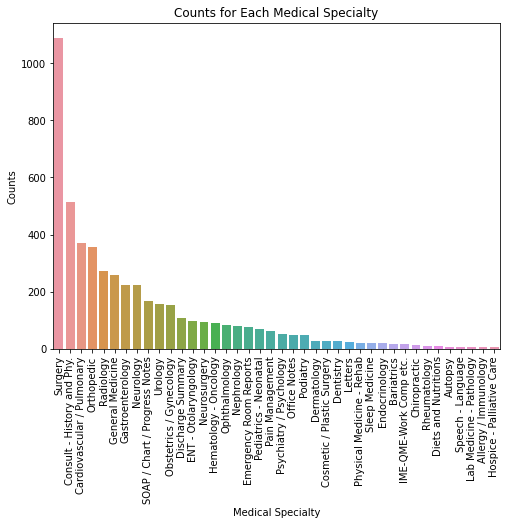

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xticks(rotation=90)

sns.countplot(x = medical_df['Medical specialty'], data = medical_df, order=medical_df['Medical specialty'].value_counts().index)
plt.xlabel('Medical Specialty')
plt.ylabel('Counts')
plt.title('Counts for Each Medical Specialty')
#may need to run cell twice

The most common "medical specialty" in our dataset is `Surgery`, while `Hospice/Palliative Care` occurs the least. Now, let's look at our `Sample name` column. There are over 1900 unique values in this column, so we will view the top 20. 

In [28]:
print('There are {} unique values in our Sample name column.'.format(len(medical_df['Sample name'].value_counts())))

There are 1924 unique values in our Sample name column.


In [29]:
sample_counts = medical_df['Sample name'].value_counts()
sample_counts[sample_counts >= 15]

EMG/Nerve Conduction Study                                   27
Anterior Cervical Discectomy & Fusion                        27
CT Abdomen & Pelvis                                          27
Normal Physical Exam Template                                21
Gen Med Consult                                              18
Cardiac Catheterization                                      18
 Heart Catheterization, Ventriculography, & Angiography      18
Carpal Tunnel Release                                        18
Gen Med SOAP                                                 18
Delivery Note                                                18
Esophagogastroduodenoscopy                                   18
Colonoscopy                                                  18
Gen Med Progress Note                                        18
Low-Transverse C-Section                                     18
Laparoscopic Cholecystectomy                                 18
Discharge Summary                       

By viewing the top 20 `Sample name`'s, we can see more surgeries than other `Sample name`'s, which is what we determined above. Now, we will look at the values in our `Keywords` column. Notice, in our `medical_df.head(3)` output above, the keywords in our `Keywords` column are placed in a cell separated by commas. To analyze our keywords, we will need to use a loop to split the keywords on the comma, remove the whitespaces, and add our keywords to a list (List—Iterating through multiple values for one dict key in python, n.d.). 

In [30]:
from tqdm.notebook import tqdm
keyword_dict=dict(medical_df['Keywords'])

In [31]:
separated_keys = []

for key,value in tqdm(keyword_dict.items()):
    for vals in value.split(','): #split keywords on comma 
            #some keywords contain "/"
        separated_keys.append(vals.strip(' ')) #strip whitespaces
#         print(vals)

In [32]:
len(separated_keys)

54880

With our keywords in a list, we can apply the `FreqDist()` function and then view the most common keywords. 

In [33]:
from nltk import FreqDist
keywords_fd = FreqDist(separated_keys)

In [34]:
print('There are {} unique Keywords.'.format(len(keywords_fd)))

There are 10314 unique Keywords.


In [35]:
keywords_fd.most_common(20)

[('', 2448),
 ('NR', 1147),
 ('surgery', 1027),
 ('orthopedic', 307),
 ('cardiovascular / pulmonary', 276),
 ('radiology', 250),
 (': Thesetranscribed medical transcription sample reports and examples are provided by various users andare for reference purpose only. MTHelpLine does not certify accuracy and quality of sample reports.These transcribed medical transcription sample reports may include some uncommon or unusual formats;this would be due to the preference of the dictating physician. All names and dates have beenchanged (or removed) to keep confidentiality. Any resemblance of any type of name or date orplace or anything else to real world is purely incidental.',
  220),
 ('consult - history and phy.', 219),
 ('gastroenterology', 192),
 ('neurology', 165),
 ('urology', 143),
 ('general medicine', 143),
 ('soap / chart / progress notes', 140),
 ('cervical', 129),
 ('obstetrics / gynecology', 128),
 ('artery', 123),
 ('laparoscopic', 121),
 ('abdomen', 114),
 ('anterior', 105),
 (

Notice, the "top" keywords are also associated with surgery. This can be seen with the terms "surgery", "artery", "laparoscopic", "neurology", "urology", etc. 

### Word Counts for `Transcription`

To continue our data exploration, we need to analyze the words/terms in our `Transcription` column. To do this, we will first clean our text with the text cleaning function from Week 5, and then we will look at the top word counts, top 2-grams for all the transcriptions. Then, we will look at the top word counts for each medical specialty. 

In [36]:
import spacy
nlp = spacy.load('en_core_web_lg')
import nltk
import time
import string

In [37]:
stopwords = nltk.corpus.stopwords.words('english')

In [38]:
data = medical_df['Transcription']

In [39]:
# stopwords = set(stopwords + []) 

In [40]:
#function from Week 5 Starter
def clean_text(docs):
    # remove punctuation and numbers
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...longest part')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # keep the word if it's a pronoun, otherwise use the lemma otherwise spacy substitutes '-PRON-' for pronouns
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs] 
    
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [41]:
start = time.time()
clean_transcription = clean_text(data)
end = time.time()
print('Process took {} minutes'.format(round((end-start)/60,2)))

removing punctuation and digits
spacy nlp...longest part
getting lemmas
removing stopwords
Process took 7.6 minutes


To look at the top words in our `Transcription` column, we can create a WordCloud. 

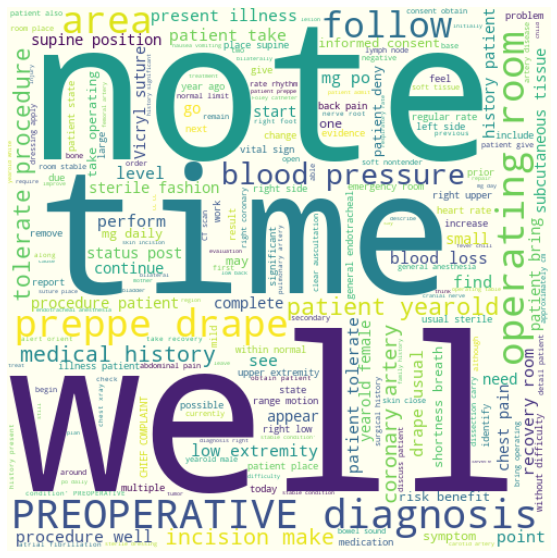

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig = plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=500, height=500, background_color ="ivory").generate(str(clean_transcription))

plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis("off")

#### Count 2-Grams for `Transcription`

Recall from Week 3, the term N-gram is a concept found in Natural Language Processing and is a sequence of words of a length *n* (Kumar, 2017). To count N-grams, we can use the CountVectorizer found in sklearn.feature_extraction.text (Sklearn. Feature_extraction, n.d.). This module allows us to tokenize a collection of text and convert the tokenized text to a matrix of token counts (Sklearn. Feature_extraction, n.d.). To do this, we need to first import the CountVectorizer. Then, we can create out CountVectorizer so that it counts 2-grams by using the argument `ngram_range=[2,2]`. From here, we can `fit_transform` our vectorizer to our `clean_transcription` variable (created above). 

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
type(clean_transcription)

list

In [45]:
vectorizer = CountVectorizer(ngram_range=[2,2]) #create count vectorizer for 2-grams
bigram = vectorizer.fit_transform(clean_transcription) #fit the vecorizer to our text (must be a list)
bigram

<4960x309911 sparse matrix of type '<class 'numpy.int64'>'
	with 1172745 stored elements in Compressed Sparse Row format>

To get the word that matches the count, we can look at the `vocabulary_` of the 'vectorizer'. The .vocabulary_ command maps the words to their counts, which is then stored in a dictionary where the word is the key and the value is the index (Sklearn. Feature_extraction, n.d.). To limit the output of the dictionary, we can use a slicing technique and then store the "sliced" key:value pairs in a dictionary.

In [46]:
dict_bigram = vectorizer.vocabulary_
out_bigram = dict(list(dict_bigram.items())[0: 20]) #limit output
out_bigram

{'subjective yearold': 265137,
 'yearold white': 309329,
 'white female': 304791,
 'female present': 100852,
 'present complaint': 212926,
 'complaint allergy': 51874,
 'allergy use': 9010,
 'use allergy': 293234,
 'allergy live': 8964,
 'live seattle': 153852,
 'seattle think': 242965,
 'think bad': 277229,
 'bad past': 25688,
 'past try': 196095,
 'try claritin': 286718,
 'claritin zyrtec': 47037,
 'zyrtec work': 309903,
 'work short': 306841,
 'short time': 248417,
 'time seem': 280302}

To get the actual counts of the word (key), we can use the .flatten() function to "collapse" our matrix into one dimension and input an index above (NumPy Array manipulation, 2020). 

In [47]:
bigram.todense().flatten()[0, 265137] #counts for 'subjective yearold'

1

#### WordCloud of 2-Grams

To create a WordCloud of the counts for the 2-grams, we will use the `generate_from_frequencies` method which creates a WordCloud from words and frequencies (Mueller, 2020). First, we need to be able to get the counts from our matrix we created above. The variable `bigram` contains the transformed and fitted vectorizer matrix which has the raw counts for the 2-grams. To retrieve the counts from this matrix, we need to use the `todense()` function to get the raw counts, and then we use the `flatten()` function to collapse the matrix, similar to above. Then, we need to take this matrix and transform it into a NumPy array so that is a single dimension array rather than a matrix with multiple dimensions.

In [48]:
import numpy as np
bi_counts = np.array(bigram.todense()).flatten() 
bi_counts #notice single brackets (single dimension)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Next, we will create a dictionary to hold the counts for each 2-gram. We will loop though our 2-grams (keys) and then loop through the indexes which are being held in the `vectorizer.vocabulary_` dictionary. The dictionary allows us to map the 2-grams to their counts. 

In [49]:
type(vectorizer.vocabulary_)

dict

In [50]:
freq_dict_bigrams = {} #empty frequency dictionary
for v, i in vectorizer.vocabulary_.items():
    freq_dict_bigrams[v] = bi_counts[i] #keys = words (v), counts = index (i)

Now, we can create out WordCloud from the frequencies in our `freq_dict_bigrams` dictionary. 

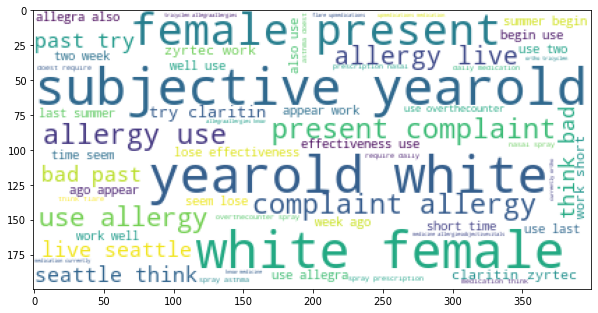

In [51]:
import wordcloud
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
wc = wordcloud.WordCloud(background_color ="white")
plt.imshow(wc.generate_from_frequencies(freq_dict_bigrams))
#Sometimes cell needs to be run twice 

We can also view the counts of our bigrams by sorting our `freq_dict_bigrams`.

In [52]:
from operator import itemgetter
sort_bigram = sorted(freq_dict_bigrams.items(), key=itemgetter(1), reverse = True) #sort by 'counts' in descending order 
sort_bigram[:20]

[('subjective yearold', 1),
 ('yearold white', 1),
 ('white female', 1),
 ('female present', 1),
 ('present complaint', 1),
 ('complaint allergy', 1),
 ('allergy use', 1),
 ('use allergy', 1),
 ('allergy live', 1),
 ('live seattle', 1),
 ('seattle think', 1),
 ('think bad', 1),
 ('bad past', 1),
 ('past try', 1),
 ('try claritin', 1),
 ('claritin zyrtec', 1),
 ('zyrtec work', 1),
 ('work short', 1),
 ('short time', 1),
 ('time seem', 1)]

Most of our 2-grams are associated with allergies, even though "Allergy / Immunology" is one of the least occurring medical specialty. 

### Word Counts for Each `Medical specialty`

We have looked at the top words and the top 2-grams for our overall text in the `Transcription` column. Now, we will look at the top word counts by each `Medical specialty`. Recall, the unique values for our `Medical specialty`column. 

In [53]:
medical_df['Medical specialty'].unique()

array(['Allergy / Immunology', 'Bariatrics', 'Cardiovascular / Pulmonary',
       'Neurology', 'Dentistry', 'Urology', 'General Medicine', 'Surgery',
       'Speech - Language', 'SOAP / Chart / Progress Notes',
       'Sleep Medicine', 'Rheumatology', 'Radiology',
       'Psychiatry / Psychology', 'Podiatry', 'Physical Medicine - Rehab',
       'Pediatrics - Neonatal', 'Pain Management', 'Orthopedic',
       'Ophthalmology', 'Office Notes', 'Obstetrics / Gynecology',
       'Neurosurgery', 'Nephrology', 'Letters',
       'Lab Medicine - Pathology', 'IME-QME-Work Comp etc.',
       'Hospice - Palliative Care', 'Hematology - Oncology',
       'Gastroenterology', 'ENT - Otolaryngology', 'Endocrinology',
       'Emergency Room Reports', 'Discharge Summary',
       'Diets and Nutritions', 'Dermatology',
       'Cosmetic / Plastic Surgery', 'Consult - History and Phy.',
       'Chiropractic', 'Autopsy'], dtype=object)

First, we need to ensure we can separate our transcriptions by the medical specialty. To do this, we need to convert our `clean_transcription` variable to a NumPy array. Once we have our cleaned transcriptions separated by a particular medical specialty (we will use `Allergy / Immunology` below), we can store this array in a variable (`overall_0`). Then we can use NLTK to tokenize the text and apply the FreqDist function to the `overall_0` variable. Once the FreqDist function has been used, we can use the `most_common()` function to get the most frequent words in for each specialty.

In [54]:
#get 'medical specialty' for 'Allergy / Immunology' 
overall_0 = np.array(clean_transcription)[medical_df['Medical specialty']=='Allergy / Immunology']

In [55]:
len(overall_0), type(overall_0)

(7, numpy.ndarray)

In [56]:
wordcount0 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(overall_0)))
wordcount0.most_common(15)

[('history', 36),
 ('patient', 25),
 ('allergy', 22),
 ('note', 16),
 ('without', 15),
 ('use', 14),
 ('nasal', 13),
 ('masse', 12),
 ('time', 11),
 ('normal', 11),
 ('also', 10),
 ('asthma', 10),
 ('clear', 10),
 ('allergic', 10),
 ('treatment', 10)]

In [57]:
type(wordcount0)

nltk.probability.FreqDist

To apply these steps to all the medical specialties, we can use a loop and store the information in a list. 

In [58]:
med_specialty = []

for i in tqdm(medical_df['Medical specialty'].unique()):
        med_specialty.append(nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(np.array(clean_transcription)[medical_df['Medical specialty'] == i]))))

In [59]:
len(med_specialty)

40

Now, we can loop through our `med_specialty` list above to print the top word counts for each medical specialty. 

In [60]:
for i in range(0,len(med_specialty)):
    print('Medical Specialty - {}: {}'.format(medical_df['Medical specialty'].unique()[i], med_specialty[i].most_common(20)), '\n')    

Medical Specialty - Allergy / Immunology: [('history', 36), ('patient', 25), ('allergy', 22), ('note', 16), ('without', 15), ('use', 14), ('nasal', 13), ('masse', 12), ('time', 11), ('normal', 11), ('also', 10), ('asthma', 10), ('clear', 10), ('allergic', 10), ('treatment', 10), ('acute', 10), ('lesion', 10), ('daily', 9), ('bilaterally', 9), ('intact', 9)] 

Medical Specialty - Bariatrics: [('patient', 62), ('history', 48), ('also', 41), ('weight', 35), ('gastric', 30), ('include', 29), ('surgery', 29), ('loss', 24), ('bypass', 23), ('place', 23), ('pain', 21), ('need', 21), ('well', 21), ('week', 20), ('pound', 19), ('abdomen', 19), ('obesity', 18), ('procedure', 18), ('mg', 18), ('two', 17)] 

Medical Specialty - Cardiovascular / Pulmonary: [('patient', 1649), ('right', 1243), ('artery', 1125), ('left', 934), ('coronary', 636), ('normal', 592), ('history', 591), ('use', 564), ('leave', 518), ('place', 504), ('catheter', 479), ('procedure', 471), ('chest', 471), ('mg', 434), ('pressu

One of the most occurring top word in each medical specialty is "patient", which should be added to our stopwords list in the future. 

## Text Classification

We can now move on to the text classification portion of the assignment. Recall, we will be using our transcription data to classify our data into a medical specialty. We will store this data in their own variables to make the data easily accessible. 

In [61]:
data = medical_df['Transcription']
labels = medical_df['Medical specialty']

In [62]:
labels[0], data[0]

('Allergy / Immunology',
 'SUBJECTIVE:,  This 23-year-old white female presents with complaint of allergies.  She used to have allergies when she lived in Seattle but she thinks they are worse here.  In the past, she has tried Claritin, and Zyrtec.  Both worked for short time but then seemed to lose effectiveness.  She has used Allegra also.  She used that last summer and she began using it again two weeks ago.  It does not appear to be working very well.  She has used over-the-counter sprays but no prescription nasal sprays.  She does have asthma but doest not require daily medication for this and does not think it is flaring up.,MEDICATIONS: , Her only medication currently is Ortho Tri-Cyclen and the Allegra.,ALLERGIES: , She has no known medicine allergies.,OBJECTIVE:,Vitals:  Weight was 130 pounds and blood pressure 124/78.,HEENT:  Her throat was mildly erythematous without exudate.  Nasal mucosa was erythematous and swollen.  Only clear drainage was seen.  TMs were clear.,Neck:  S

### Split Data into Train and Test Set

Now, we will split our data into a training set and a testing set. We will use the training set to train our classification algorithm, and then we will apply the trained classifier on our test set. To split our data, we will use the `train_test_split()` function from sklearn (Train_test_split, n.d.). Our `X` (documents) is the `data` variable above and our `y` (labels/groups/classes) is the `labels` variable above. We will sample our testing set to 25% of the full data. 

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = data # documents
y = labels # labels
# y = targets

In [65]:
print('Length of Total Documents: {}'.format(len(X)))
print('Length of Total Labels: {}'.format(len(y)))

Length of Total Documents: 4960
Length of Total Labels: 4960


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#test_size = 0.25 samples down test set to 25% of the original size

In [67]:
print('Length of Train Documents: {}'.format(len(X_train)))
print('Length of Test Documents: {}'.format(len(X_test)))
print('Length of Train Labels: {}'.format(len(y_train)))
print('Length of Test Labels: {}'.format(len(y_test)))

Length of Train Documents: 3720
Length of Test Documents: 1240
Length of Train Labels: 3720
Length of Test Labels: 1240


In [68]:
print('Confirm % Split of Training Documents: {}'.format((len(X_train)/len(X))*100))

Confirm % Split of Training Documents: 75.0


Now, we will use sklearn's `TfidfVectorizer` to `fit_transform` the vectorizer to our `X_train` (training documents) our transform our vectorizer on our `X_test` (testing documents).

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
vectorizer = TfidfVectorizer()
#fit transform test set features
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

In [71]:
train_features

<3720x21775 sparse matrix of type '<class 'numpy.float64'>'
	with 807117 stored elements in Compressed Sparse Row format>

In [72]:
train_features.todense().shape #rows (documents) x words

(3720, 21775)

### Naive Bayes Classifier

Naive Bayes "is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable (Brownlee, 2019)." Sklearn provides a Naive Bayes classifier for mulinomial models, which is suitable for classification with discrete features such as word counts for text classification (Naive_bayes. Multinomialnb, n.d.). Using the `MultinomialNB` function from sklearn, we can create our Naive Bayes classifier model. Then, we will fit the model to our training documents `train_features` and our training labels (`y_train`).

In [73]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(train_features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
print('Score of Model on Train Data: {}%'.format(round(model.score(train_features, y_train)*100,4)))
print('Score of Model on Test Data: {}%'.format(round(model.score(test_features, y_test)*100,4)))

Score of Model on Train Data: 32.5%
Score of Model on Test Data: 34.2742%


The accuracy_score() function takes in the correct predictions and the model's predictions and computes a subset accuracy score (Accuracy_score, n.d.). First, we need to use our trained model to make a prediction on our test features and then we can use the accuracy_score() function to score our model. 

In [75]:
preds = model.predict(test_features)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.34274193548387094


Now, let's use our model to make a prediction. From the `MTSamples` website, we will use a transcription from the medical specialty "Orthopedic" with the sample name "Achilles Lengthening" (Orthopedic-achilles lengthening (Medical transcription sample report), n.d.). Note, this is the same website the data was scraped from according to the dataset author (Boyle, n.d.). We will use the transcription associated with "History and Physical", which states (Orthopedic-achilles lengthening (Medical transcription sample report), n.d.): 

    The patient is a 10-year-old boy who has been a toe walker since he started ambulating at about a year. The patient had some mild hamstring tightness with his popliteal angle of approximately 20 degrees bilaterally. He does not walk with a crouched gait but does toe walk. Given his tightness, surgery versus observation was recommended to the family. Family however wanted to correct his toe walking. Surgery was then discussed. Risks of surgery include risks of anesthesia, infection, bleeding, changes in sensation and motion of the extremities, failure to resolve toe walking, possible stiffness, cast, and cast problems. All questions were answered and parents agreed to above surgical plan.
    
To apply our model and predict the category this transcription belongs in, we need to `transform()` the transcription. Similar to what we did with our `test_features` above. 

In [76]:
new_data =  vectorizer.transform(["The patient is a 10-year-old boy who has been a toe walker since he started ambulating at about a year. The patient had some mild hamstring tightness with his popliteal angle of approximately 20 degrees bilaterally. He does not walk with a crouched gait but does toe walk. Given his tightness, surgery versus observation was recommended to the family. Family however wanted to correct his toe walking. Surgery was then discussed. Risks of surgery include risks of anesthesia, infection, bleeding, changes in sensation and motion of the extremities, failure to resolve toe walking, possible stiffness, cast, and cast problems. All questions were answered and parents agreed to above surgical plan."])

In [77]:
model.predict(new_data)

array(['Surgery'], dtype='<U29')

We see that our model predicted that this transcription belongs in the "Surgery" medical specialty. If we continue to read the rest of the notes on the `MTSamples` webpage, we can see that the patient was taken to the operating room and surgery was performed. In this case, the model predicted correctly, even though our model's accuracy is ~32%.

We can also compute the precision score of our model. Precision is "defined as the number of true positives divided by the number of true positives plus the number of false positives (Koehrsen, 2018)." The best value is 1, and the worst value is 0 (Precision_score, n.d.). We can use the precision_score function in sklearn. We can calculate three different averages (Precision_score, n.d.):

    1. Macro: "Calculate metrics for each label, and finds their unweighted mean. This does not take label imbalance into account."
    2. Micro: "Calculate metrics globally by counting the total true positives, false negatives and false positives."
    3. Weighted: "Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters 'macro' to account for label imbalance; it can result in an F-score that is not between precision and recall."

The precision_score function takes in the correct predictions and the model's predictions (Precision_score, n.d.).

In [78]:
import warnings
warnings.filterwarnings('ignore') #to not show warnings below

In [79]:
from sklearn.metrics import precision_score 

print('Macro Average:', precision_score(y_test, preds, average = 'macro'))
print('Micro Average:', precision_score(y_test, preds, average = 'micro'))
print('Weighted Average:', precision_score(y_test, preds, average = 'weighted'))

Macro Average: 0.03922262819090982
Micro Average: 0.34274193548387094
Weighted Average: 0.18340675997883465


Recall "expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant (Koehrsen, 2018)." Similar to precision_score, we can compute a macro, micro, and weighted average (Recall_score, n.d.). Also similar to precision_score, a value of 1 is the best and a 0 is the worst.

In [80]:
from sklearn.metrics import recall_score 

print('Macro Average:', recall_score(y_test, preds, average = 'macro'))
print('Micro Average:', recall_score(y_test, preds, average = 'micro'))
print('Weighted Average:', recall_score(y_test, preds, average = 'weighted'))

Macro Average: 0.05350048364954997
Micro Average: 0.34274193548387094
Weighted Average: 0.34274193548387094


We can combine precision and recall scores and calculate a F1 score. A F1 score is calculated by the following equation: 2*((precision * recall/precision + recall)) (Koehrsen, 2018). One method of computing the F1 score is to create a classification report using the classification_report function from sklearn. The classification reports contains the macro average, the weighted average, and sample average (accuracy) (Classification_report, n.d.)."

In [81]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, preds))

                               precision    recall  f1-score   support

         Allergy / Immunology       0.00      0.00      0.00         2
                      Autopsy       0.00      0.00      0.00         1
                   Bariatrics       0.00      0.00      0.00         4
   Cardiovascular / Pulmonary       0.55      0.12      0.19       103
                 Chiropractic       0.00      0.00      0.00         4
   Consult - History and Phy.       0.27      0.96      0.42       127
   Cosmetic / Plastic Surgery       0.00      0.00      0.00         7
                    Dentistry       0.00      0.00      0.00         9
                  Dermatology       0.00      0.00      0.00         5
            Discharge Summary       0.00      0.00      0.00        26
         ENT - Otolaryngology       0.00      0.00      0.00        30
       Emergency Room Reports       0.00      0.00      0.00        17
                Endocrinology       0.00      0.00      0.00         2
     

#### Confusion Matrix

One way to visualize precision and recall is to create a confusion matrix. A confusion matrix calculates precision and recall from our model's predicted labels and shows the four outcomes: true positives, false positives, true negative, and false negatives (Koehrsen, 2018). The actual labels form the columns and the predicted labels form the rows (Koehrsen, 2018).

In [82]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, preds)
conf_matrix

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0, 290,   0],
       [  0,   0,   0, ...,   0,  34,   0]], dtype=int64)

In [83]:
#sum of the values in each column 
import numpy as np
np.sum(conf_matrix,axis=0)

array([  0,   0,   0,  22,   0, 453,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   0, 760,   0],
      dtype=int64)

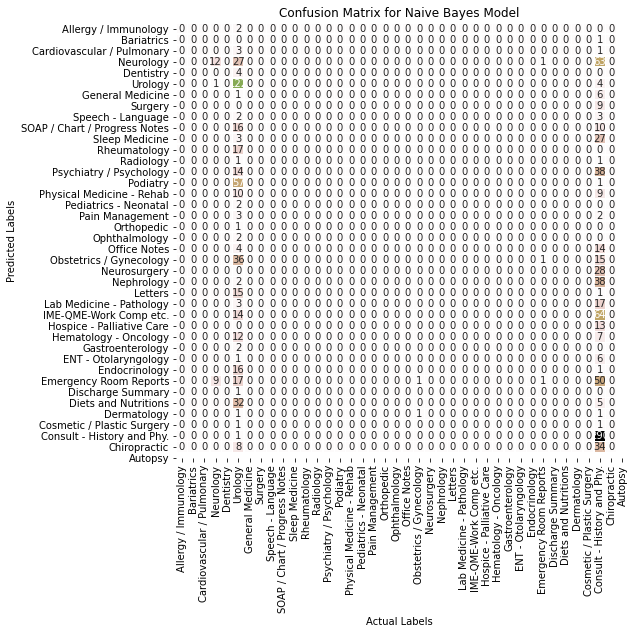

In [84]:
#confusion matrix of test set
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
names = medical_df['Medical specialty'].unique()
# ,
sns.heatmap(conf_matrix, annot=True, fmt ="d", linewidths = 0.5, 
            cbar = False, cmap ='gist_earth_r', xticklabels=names, yticklabels=names)
plt.title('Confusion Matrix for Naive Bayes Model')

plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

As demonstrated above, split our data into features and labels. After splitting the data, we created a training set and a testing set so we could train our Naive Bayes classifier algorithm. After training our model, we used it to run predictions. When we calculated the accuracy of our model, we found that our model was only ~32% accurate. 

### Support Vector Machines (SVMs)

Support vector machines (SVM) are a set of supervised learning methods that can be used for classification, regression, and outlier detection (Support Vector Machines, n.d.). A SVM class that is capable of performing binary and multiclass classification on a dataset is `LinearSVC`, where SVC stands for "Support Vector Classification" (Support Vector Machines, n.d.). The `LinearSVC` classifier takes in the training samples and labels. `LinearSVC` is similar to `SVC` with the parameter `kernal = 'linear'`, but the implementation is based on "liblinear" rather than "libsvm" (Svm. Linearsvc, n.d.). Liblinear allows for more flexibility and is faster than "libsvm" (Svm. Linearsvc, n.d.). SVM classifiers often offer good accuracy and perform faster prediction compared to the Naive Bayes algorithm (Support vector machines  (Svm) in scikit-learn, n.d.). However, SVM's are not suitable for large datasets because of its high training time. It also works poorly with overlapping classes (Support vector machines  (Svm) in scikit-learn, n.d.). 

Similar to using our Naive Bayes Classifier, we need to create the model and then fit the model to our `train_features` and `y_train`. Then, we can calculate the accuracy of the model and use it for predictions. 

In [85]:
# from sklearn import svm
# clf = svm.SVC() #kernel='linear'
# clf.fit(train_features, y_train)
# svm_preds = clf.predict(test_features)
# print(accuracy_score(y_test, svm_preds))

In [86]:
from sklearn.svm import LinearSVC

In [87]:
model_2 = LinearSVC()

In [88]:
model_2.fit(train_features, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [89]:
svc_preds = model_2.predict(test_features)
print(accuracy_score(y_test, svc_preds))

0.12419354838709677


We can see that this model is only ~12% accurate. Using the same sample of data above (`new_data` variable above), we will make a prediction using our `LinearSVC` model. 

In [90]:
model_2.predict(new_data)

array(['Orthopedic'], dtype=object)

This model predicted that this sample belongs in the "Orthopedic" category. We know by the description of our sample, the data could belong to the "Orthopedic" or the "Surgery" medical specialty. 

In [91]:
conf_matrix_svc = confusion_matrix(y_test, svc_preds)

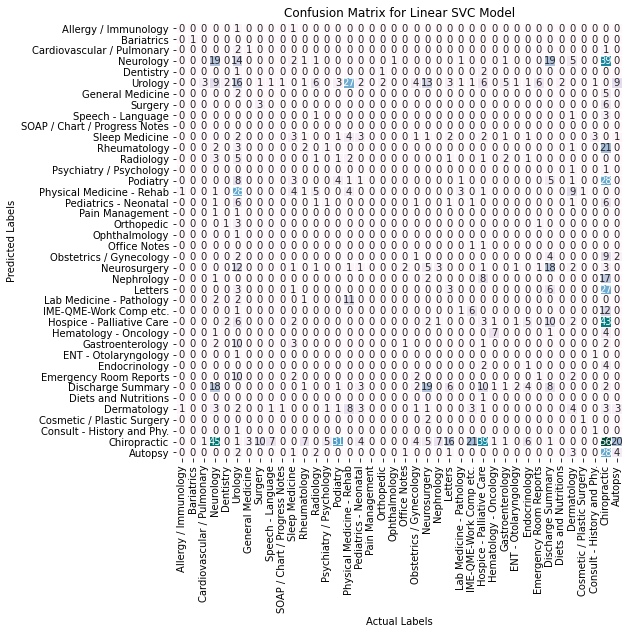

In [92]:
#confusion matrix of test set
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
names = medical_df['Medical specialty'].unique()
# ,
sns.heatmap(conf_matrix_svc, annot=True, fmt ="d", linewidths = 0.5, 
            cbar = False, cmap ='PuBuGn', xticklabels=names, yticklabels=names)
plt.title('Confusion Matrix for Linear SVC Model')

plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

For this assignment, a healthcare-related dataset was used. Specifically, this dataset contained information describing patient visits. We then used the transcription data (full description of visit) to categorize our data into medical specialties. Before we did this, we cleaned our column names and the values in our `Sample name` column, and handled the null values in our dataset. Then, we used a Naive Bayes classifying algorithm and a Support Vector Machine to classify our data. We found that the Naive Bayes algorithm was more accurate that the Linear SVC algorithm. The Naive Bayes algorithm was approximately ~32% accurate. We then collected a transcription sample and used our model to predict which category our sample belonged to. The Naive Bayes classifier placed our sample in the "Surgery" category, while the Linear SVC model placed our sample in the "Orthopedic" category. While each classification could be considered correct, "Surgery" may be optimal choice, since "Orthopedic" could be considered the type of surgery or the type of consult. To improve the accuracy of our classifiers in the future, the following techniques could be implemented (Brownlee, 2014):

    1. A different Naive Bayes distribution could be used.
    2. Redundant features could be removed.
    3. Specify parameters when creating our TfidfVectorizer (i.e. remove stop_words, use the `min_df` or `max_df`, etc.). 
    
Stopwords or low frequency words could be affecting the accuracy of our models. Tuning the parameters in our features could result in a more accurate model. 

# Resources

Accuracy_score. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

Boyle, T. (n.d.). Medical transcriptions. Retrieved June 27, 2020, from https://kaggle.com/tboyle10/medicaltranscriptions

Brownlee, J. (2014, December 9). Better naive bayes: 12 tips to get the most from the naive bayes algorithm. Machine Learning Mastery. https://machinelearningmastery.com/better-naive-bayes/

Brownlee, J. (2019, October 17). Naive bayes classifier from scratch in python. Machine Learning Mastery. https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/

Classification_report. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

Dropna. (n.d.). Retrieved June 27, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

Fillna. (n.d.). Retrieved June 27, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

Koehrsen, W. (2018, March 10). Beyond accuracy: Precision and recall. Medium. https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

Kumar, P. (2017, October 21). An introduction to n-grams: What are they and why do we need them? XRDS. https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

List—Iterating through multiple values for one dict key in python. (n.d.). Stack Overflow. Retrieved June 27, 2020, from https://stackoverflow.com/questions/44026946/iterating-through-multiple-values-for-one-dict-key-in-python

Mueller, A. (2020). Wordcloud documentation. https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

Naive_bayes. Multinomialnb. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

NumPy Array manipulation. (2020, February 26). W3resource. http://www.w3resource.com/numpy/manipulation/ndarray-flatten.php

Orthopedic-achilles lengthening(Medical transcription sample report). (n.d.). Retrieved June 27, 2020, from https://www.mtsamples.com/site/pages/sample.asp?Type=49-Orthopedic&Sample=1355-Achilles%20Lengthening

Precision_score . (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

Read_csv. (n.d.). Retrieved June 27, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

Recall_score. (n.d.). Retrieved May 31, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score


Sklearn. Feature_extraction. (n.d.). Retrieved May 24, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

Support Vector Machines. (n.d.). Retrieved June 27, 2020, from https://scikit-learn.org/stable/modules/svm.html

Support vector machines  (Svm) in scikit-learn. (2019, December 27). DataCamp Community. https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Svm. Linearsvc. (n.d.). Retrieved June 27, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

Text classification. (n.d.). MonkeyLearn. Retrieved June 27, 2020, from https://monkeylearn.com/text-classification

Train_test_split. (n.d.). Retrieved June 27, 2020, from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Visualize missing values values using Missingno Library. (2019, July 3). GeeksforGeeks. https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

World Class From the Expert: Week 4